# Preprocessing

In [2]:
import zipfile

import json

from tqdm import tqdm
import pickle

import pandas as pd
import matplotlib.pyplot as plt

from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()
kkama = Kkma()
komoran = Komoran()

from collections import Counter


from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
# 모두의 말뭉치의  [일상 대화 말뭉치 2021] 사용
zipfilename = "../data/NIKL_DIALOGUE_2021_v1.0.zip"

# 발화 리스트
utterances_list = [] 


# 압축된 zip 파일 읽기
with zipfile.ZipFile(zipfilename) as z:
  for filename in tqdm(z.namelist()):
    if not filename.endswith(('.json', '.JSON')):
      continue

    with z.open(filename) as f:  
      data = json.loads(f.read().decode("utf-8"))  

    for document in data['document']:
      # 발화 목록 업데이트:
      # 문서의 발화 목록을 기존 목록에 더하기
      utterances_list.extend(document['utterance'])

In [ ]:
# 모두의 말뭉치의  [일상 대화 말뭉치 2020] 사용
zipfilename = "../data/NIKL_DIALOGUE_2020_v1.0.zip"

# 압축된 zip 파일 읽기
with zipfile.ZipFile(zipfilename) as z:
  for filename in tqdm(z.namelist()):
    if not filename.endswith(('.json', '.JSON')):
      continue

    with z.open(filename) as f:  
      data = json.loads(f.read().decode("utf-8"))  

    for document in data['document']:
      # 발화 목록 업데이트:
      # 문서의 발화 목록을 기존 목록에 더하기
      utterances_list.extend(document['utterance'])

In [ ]:
# 모두의 말뭉치의  [국회 회의록 말뭉치2021] 사용
zipfilename = "../data/NIKL_DIALOGUE_2021_v1.0.zip"

# 발화 리스트
utterances_list = [] 


# 압축된 zip 파일 읽기
with zipfile.ZipFile(zipfilename) as z:
  for filename in tqdm(z.namelist()):
    if not filename.endswith(('.json', '.JSON')):
      continue

    with z.open(filename) as f:  
      data = json.loads(f.read().decode("utf-8"))  

    for document in data['document']:
      # 발화 목록 업데이트:
      # 문서의 발화 목록을 기존 목록에 더하기
      utterances_list.extend(document['utterance'])

In [ ]:
df_utterances = pd.DataFrame(utterances_list).to_csv('../NIKL_DL_utterances.csv')

In [3]:
!tar -czf ../NIKL_DL_utterances.csv.tar.gz ../NIKL_DL_utterances.csv
!tar -czf ../NIKL_DL_relations.csv.tar.gz ../NIKL_DL_relations.csv
!tar -czf ../NIKL_DL_ids.csv.tar.gz ../NIKL_DL_ids.csv

tar: : Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.
tar: : Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.
tar: : Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.


In [5]:
#form 열만 불러오자
utterances = pd.read_csv('../NIKL_DL_utterances.csv.tar.gz', compression='gzip', on_bad_lines='skip', usecols=[2])

utterances.dropna(inplace=True)

# Filtering

In [5]:
utterances_deul = utterances[utterances['form'].str.contains(r'들\b')]
utterances_deul

,form
154,이거 좋다 그랬던 엔시티 노래 다 엄청 빠른 노래들 아니야?
406,근데 내 친구들 보면 다 팬싸 가려고 사는
916,어 운동에 대해서는 많이들 관심을 갖지 않는 거 같아. 너는 어떻게 생각해?
965,다들 유튜브에 있는 운동 영상 보면서 운동 많이 하더라고.
988,혹시 그런 친구들 본 적 있어?
...,...
5556717,"노인들 말이지요, 어디 한 군데 주고 나면 와글와글 하잖아."
5556755,아이들 제대로 된 체육 교육 시키는 것에 투자해야 돼요. 애들 요즘 다......
5556759,애들 체육 시켜야지. 지금 예산 300억 증액시키려고 그러는데......
5556772,"진짜 강남에 있는 애들 축구 같은 것 주말에 20만 원씩 내고 하더라니까, 2시간에."


In [15]:
# form의 한 행에 여러 문장이 있는 경우가 있으므로 문장 분리
sentence = utterances_deul['form'].str.split('.', expand=True)
sentence = sentence.apply(lambda x: pd.Series(x))
sentence = sentence.stack().reset_index(level=1, drop=True).to_frame('sentences')
utterances_deul2 = utterances_deul.merge(sentence, left_index=True, right_index=True, how='left')
del utterances_deul2['form']

In [22]:
utterances_deul2 = utterances_deul2[utterances_deul2['sentences'].str.contains(r'들\b')]
utterances_deul2.reset_index(drop=True, inplace=True)
utterances_deul2

,sentences
0,이거 좋다 그랬던 엔시티 노래 다 엄청 빠른 노래들 아니야?
1,근데 내 친구들 보면 다 팬싸 가려고 사는
2,어 운동에 대해서는 많이들 관심을 갖지 않는 거 같아
3,다들 유튜브에 있는 운동 영상 보면서 운동 많이 하더라고
4,혹시 그런 친구들 본 적 있어?
...,...
120437,아이들 제대로 된 체육 교육 시키는 것에 투자해야 돼요
120438,애들 요즘 다
120439,애들 체육 시켜야지
120440,"진짜 강남에 있는 애들 축구 같은 것 주말에 20만 원씩 내고 하더라니까, 2시간에"


okt의 품사태깅에 따르면 간접 복수표지 들은 'Verb'로 분류가 된다. 이를 이용하여 간접복수표지로 사용된 경우 만을 분리하자

In [10]:
okt.pos('남자들이 공원에서들 축구들 하다가 오셨다들')

[('남자', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('공원', 'Noun'),
 ('에서', 'Josa'),
 ('들', 'Verb'),
 ('축구', 'Noun'),
 ('들', 'Suffix'),
 ('하다가', 'Verb'),
 ('오셨다', 'Verb'),
 ('들', 'Verb')]

In [12]:
kkama.pos('남자들이 공원에서들 축구들 하다가들 오셨다들')
# 오셨대요들의 들을 듣으로 분류함

[('남자', 'NNG'),
 ('들', 'XSN'),
 ('이', 'JKS'),
 ('공원', 'NNG'),
 ('에서', 'JKM'),
 ('드', 'VV'),
 ('ㄹ', 'ETD'),
 ('축구', 'NNG'),
 ('들', 'XSN'),
 ('하다', 'NNP'),
 ('가', 'JKS'),
 ('들', 'VV'),
 ('ㄹ', 'ETD'),
 ('오시', 'VV'),
 ('었', 'EPT'),
 ('다', 'ECS'),
 ('듣', 'VV')]

In [13]:
komoran.pos('남자들이 공원에서들 축구들 하다가 오셨다들')
#간접과 직접을 구분하지 못함

[('남자들', 'NNP'),
 ('이', 'JKS'),
 ('공원', 'NNG'),
 ('에서', 'JKB'),
 ('들', 'XSN'),
 ('축구', 'NNG'),
 ('들', 'XSN'),
 ('하', 'VV'),
 ('다가', 'EC'),
 ('오', 'VX'),
 ('시', 'EP'),
 ('었', 'EP'),
 ('다', 'EC'),
 ('들', 'XSN')]

In [23]:
#들이 간접으로 사용된 경우만을 추출
for i, sentence in enumerate(utterances_deul2['sentences']):
    if ('들', 'Verb') in okt.pos(sentence):
        pass
    else:
        utterances_deul2.drop(i, inplace= True)



In [132]:
utterances_deul2

,sentences,tagger_kkama,tagger_okt
0,어 운동에 대해서는 많이들 관심을 갖지 않는 거 같아,"[어/VV, 어/ECS, 운동/NNG, 에/JKM, 대하/VV, 어서/ECD, 는/...","[어/Eomi, 운동/Noun, 에/Josa, 대해/Noun, 서는/Verb, 많이..."
1,다들 유튜브에 있는 운동 영상 보면서 운동 많이 하더라고,"[다/MAG, 들/VV, ㄹ/ETD, 유/NNG, 튜브/NNG, 에/JKM, 있/V...","[다/Adverb, 들/Verb, 유튜브/Noun, 에/Josa, 있는/Adject..."
2,요즘에 배달 음식 많이들 시켜 먹던데,"[요즘/NNG, 에/JKM, 배달/NNG, 음식/NNG, 많이/MAG, 들/JX, ...","[요즘/Noun, 에/Josa, 배달/Noun, 음식/Noun, 많이/Adverb,..."
3,그렇구나 보통 떡볶이보다 그 사이드메뉴가 더 맛있어 가지고 다들 사이드메뉴를 더 많...,"[그렇/VA, 구나/EFI, 보통/MAG, 떡볶이/NNG, 보다/JKM, 그/MDT...","[그렇구나/Adjective, 보통/Noun, 떡볶이/Noun, 보다/Josa, 그..."
4,처리하는 부분에서도 크게 문제가 없다 보니까 많이들 시켜 먹는 거 같아,"[처리/NNG, 하/XSV, 는/ETD, 부분/NNG, 에서/JKM, 도/JX, 크...","[처리/Noun, 하는/Verb, 부분/Noun, 에서도/Josa, 크게/Noun,..."
...,...,...,...
5635,그런 상황에서 종합편성채널은 일반 지상파 이상의 파괴력을 갖고 있다고 다들 보기 때...,"[그런/MDT, 상황/NNG, 에서/JKM, 종합/NNG, 편성/NNG, 채널/NN...","[그런/Adjective, 상황/Noun, 에서/Josa, 종합/Noun, 편성/N..."
5636,"이 부분에 대해서는 의견들이 다들, 생각들이 다들 많으실 것 같아","[이/MDT, 부분/NNG, 에/JKM, 대하/VV, 어서/ECD, 는/JX, 의견...","[이/Noun, 부분/Noun, 에/Josa, 대해/Noun, 서는/Verb, 의견..."
5637,그래서 각 개별법들에 있는 과태료 조항들을 지금 사실 다들 없애고 있습니다,"[그래서/MAC, 각/MDT, 개별법/NNG, 들/XSN, 에/JKM, 있/VV, ...","[그래서/Adverb, 각/Noun, 개별/Noun, 법/Noun, 들/Suffix..."
5638,"거기다 저희가 듣기로는, 연계된 DB들 있잖아요","[거기/NP, 이/VCP, 다/EFN, 저희/NP, 가/JKS, 듣기/NNG, 로/...","[거기/Noun, 다/Josa, 저희/Noun, 가/Josa, 듣기/Noun, 로는..."


In [25]:
#많이 발견되지만 간접복수표지가 이닌경우 수작업으로 제거
utterances_deul2 = utterances_deul2[utterances_deul2['sentences'].str.contains(r'님들\b') == False]
utterances_deul2 = utterances_deul2[utterances_deul2['sentences'].str.contains(r'네들\b') == False]
utterances_deul2 = utterances_deul2[utterances_deul2['sentences'].str.contains(r'\b들\b') == False]
utterances_deul2.reset_index(drop=True, inplace=True)

In [8]:
# 추후 편의를 위해 csv로 저장하고 불러오는 코드 
# utterances_deul2.to_csv('deul.csv')
# utterances_deul2 = pd.read_csv('../data/deul.csv')

# Tag

In [10]:
# tag 를 결합시킨 데이터프레임 만들기
tagger_kkama = []
tagger_okt = []
for sentence in utterances_deul2['sentences']:
    tagger_kkama.append(kkama.pos(sentence, join=True))
    tagger_okt.append(okt.pos(sentence, join=True))
utterances_deul2['tagger_kkama'] = tagger_kkama
utterances_deul2['tagger_okt'] = tagger_okt


# Counting

들과 직접적으로 결합하는 단어를 파악하기 위한 코드들입니다.

In [16]:
okt_deul = utterances_deul2['tagger_okt']
deulplus = []
for sentence in okt_deul:
    for i, word in enumerate(sentence):
        if word == '들/Verb':
            deulplus.append(sentence[i-1])

In [17]:
count = Counter(deulplus)
plusdeul = pd.DataFrame.from_dict(count, orient='index').sort_values(0, ascending=False).reset_index()

In [18]:
c_index = plusdeul['index'].str.split('/', expand=True)
plusdeul = pd.concat([ c_index, plusdeul], axis=1)
del plusdeul['index']
plusdeul.columns = ['word', 'okt_tag', 'count']

In [19]:
plusdeul.head(10)

,word,okt_tag,count
0,다,Adverb,3945
1,많이,Adverb,426
2,한,Verb,274
3,본,Verb,94
4,흔히,Adjective,87
5,푸,Verb,59
6,한,Josa,51
7,그렇게,Adverb,49
8,에서,Josa,26
9,열심히,Adverb,24


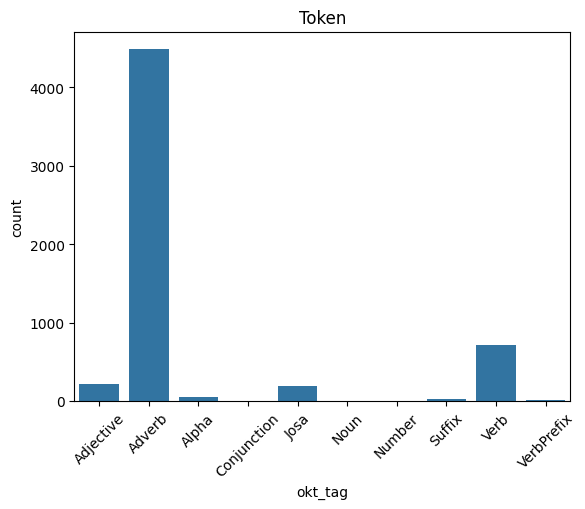

In [35]:
#token
tag_count = plusdeul.groupby('okt_tag').sum(count)
plt.xticks(rotation=45, fontsize=10)
plt.title('Token')
sns.barplot(x = 'okt_tag', y = 'count', data = tag_count)
plt.savefig('token.png')

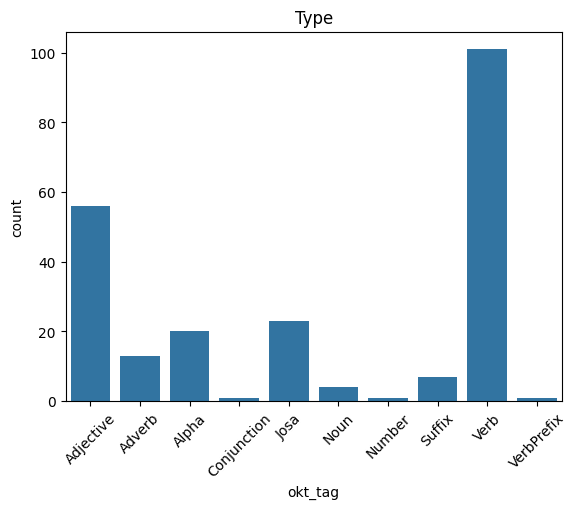

In [36]:
#type
tag_count = plusdeul.groupby('okt_tag').count()
plt.xticks(rotation=45, fontsize=10)
plt.title('Type')
sns.barplot(x = 'okt_tag', y = 'count', data = tag_count)
plt.savefig('type.png')

In [38]:

#다들의 빈도
plusdeul['count'][0] / sum(plusdeul['count']) * 100


68.88423258250393

In [39]:
#다들 + 많이의 빈도
(plusdeul['count'][0] + plusdeul['count'][1]) / sum(plusdeul['count']) * 100

76.32268203247774

# 주어

In [11]:
# 주격조사 앞에 나타난 단어만을 수집
list_JKS= []
for i, tag in enumerate(utterances_deul2['tagger_kkama']):
    for j ,word in enumerate(tag):
        if 'JKS' in word:
            list_JKS.append(tag[j-1])

In [12]:
df_JKS = pd.DataFrame.from_dict(Counter(list_JKS), orient='index').reset_index()
df_JKS = df_JKS.sort_values(0, ascending=False)
df_JKS.reset_index(drop=True, inplace=True)
df_JKS.columns = ['word', 'count']

In [ ]:
df_JKS.head(10)

,word,count
0,들/XSN,590
1,것/NNB,417
2,우리/NP,219
3,이것/NP,172
4,문제/NNG,75
5,생각/NNG,75
6,기/ETN,63
7,저/NP,60
8,저희/NP,60
9,님/XSN,51


In [15]:

# 주어에 들이 나타난 빈도
df_JKS['count'][0] / sum(df_JKS['count']) * 100


13.294276701216765

In [14]:
# 주어에 들, 너희, 우리가 나타난 빈도
(df_JKS['count'][0]+df_JKS['count'][2]+df_JKS['count'][7]) / sum(df_JKS['count']) * 100


19.580892293826047

# 종결 표현

In [35]:
#종결표현의 경우 EF로 분류됨을 이용해 종결표현만 추출
list_EFs = []
for tag in utterances_deul2['tagger_kkama']:
    for word in tag:
        if 'EF' in word:
            list_EFs.append(word)

In [36]:
efs = pd.DataFrame(list_EFs)
efs.columns = ['word']
df_EFs = pd.DataFrame.from_dict(Counter(list_EFs), orient='index').sort_values(0, ascending=False).reset_index()
df_EFs.columns = ['word', 'count']

In [37]:
# 종결표현에 실현된 상대높임법에 따라 공손성, 격식성을 분류
# 하십시오와 하오체 : 공손성+ 격식성+
# 하게와 해라체 : 공손성- 격식성+
# 해요체 : 공손성 + 격식성 -
# 해체 : 공손성 - 격식성-
list_pol = []
list_for = []
for word in df_EFs['word']:
    if '습' in word or 'ㅂ' in word or '오' in word or '소' in word:
        list_pol.append('pol')
        list_for.append('for')
    elif '요' in word or '죠' in word:
        list_pol.append('pol')
        list_for.append('inf')
    elif '다고' in word or '라고' in word:
        list_pol.append('quo')
        list_for.append('quo')
    elif any(keyword in word for keyword in ['라', '가', '냐', '리', '구나', '다', '자', '네']):
        list_pol.append('imp')
        list_for.append('for')
    else:
        list_pol.append('imp')
        list_for.append('inf')

df_EFs['formality'] = list_for
df_EFs['politeness'] = list_pol

In [7]:
ef = pd.merge(efs, df_EFs, on= 'word')

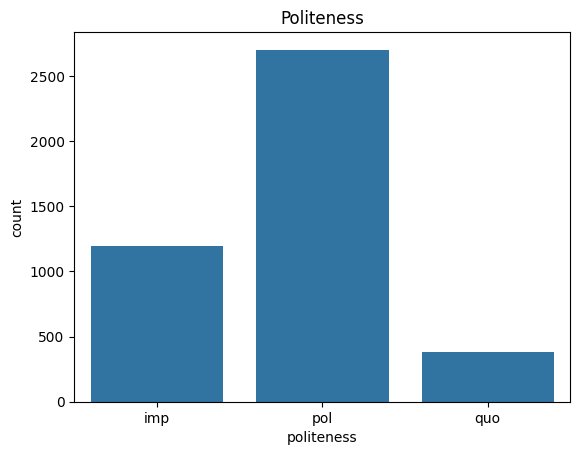

In [60]:
pol1_sum = ef.groupby('politeness').count()
plt.title('Politeness')
sns.barplot(x = 'politeness', y = 'count', data = pol1_sum)
plt.savefig('image/pol.png')


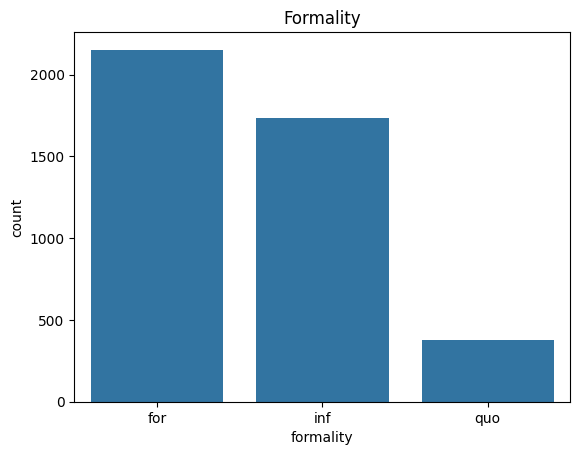

In [12]:
for1_sum = ef.groupby('formality').count()
plt.title('Formality')
sns.barplot(x = 'formality', y = 'count', data = for1_sum)
plt.savefig('image/for.png')
            

In [10]:
index_sun = []
for i, tag in enumerate(utterances_deul2['tagger_kkama']):
    for word in tag:
        if word.endswith('EPH') or word.endswith('ETP') or word.endswith('EFR'):
            index_sun.append(i)

In [115]:
len(index_sun) / len(utterances_deul2.index)
# 간접 복수 표지 -들 중 20%가 주체 높임 선어말 어미 -시와 결합

0.20815602836879432

# 다들

In [ ]:
utterances2 = utterances.sample(2000000)
#데이터가 너무 크기에 2000000개만 샘플링함

In [ ]:
corpus = utterances2['form'].apply(str.split)
print(corpus[:5])

In [ ]:
model = Word2Vec(
    sg=1, 
    min_count=5,
    vector_size=100, 
    window=6, 
    negative=5,
)

In [ ]:
model.build_vocab(corpus_iterable=tqdm(corpus))

In [ ]:
model.train(
    corpus_iterable=corpus,
    total_examples=model.corpus_count, # the number of sentences
    epochs=5 #코퍼스를 다섯 번 읽어라
)

In [ ]:
model.save('../models/word2vec-dadeul-online')

In [118]:
MODEL_PATH = '../models/word2vec-dadeul-online'

model = Word2Vec.load(MODEL_PATH)

In [119]:
#다들과 유사하게 사용되는 단어 
model.wv.most_similar(['다들'])

[('많이들', 0.7172414660453796),
 ('모두들', 0.6949450969696045),
 ('계시더라고요.', 0.6867292523384094),
 ('시대라고', 0.6835435032844543),
 ('교수님도', 0.6825608611106873),
 ('교수님들도', 0.6750579476356506),
 ('많으셔서', 0.6732888221740723),
 ('그분도', 0.6703954339027405),
 ('어르신들이', 0.6677936315536499),
 ('어머님도', 0.6653468608856201)]

# 배분 부사


In [26]:
deuldis =  utterances_deul2[utterances_deul2['sentences'].str.contains(r'각각|각자|마다|끼리|씩')]

In [27]:
#배분부사와 들이 함께 나타난 빈도
len(deuldis)/ len(utterances_deul2) *100

2.8014184397163118

# 집단성 제거

In [28]:
# 주어에 집단성이 나타난 경우와, 직접결합하는 단어에 나타난 경우 모두 제거
noplu =  utterances_deul2[utterances_deul2['sentences'].str.contains(r'다들') == False]
noplu = noplu[noplu['sentences'].str.contains(r'많이들') == False]
noplu.reset_index(drop=True, inplace=True)


In [29]:
for i, tag in enumerate(noplu['tagger_okt']):
    if '들/Suffix' in tag:
        noplu.drop(i,axis=0, inplace=True)

In [30]:
list_noplu = []
for tag in noplu['tagger_kkama']:
    for word in tag:
        if 'EF' in word:
            list_noplu.append(word)

In [33]:
df_ef = pd.DataFrame(list_noplu)
df_ef.columns = ['word']

In [38]:
noef = pd.merge(df_ef, df_EFs, on= 'word')

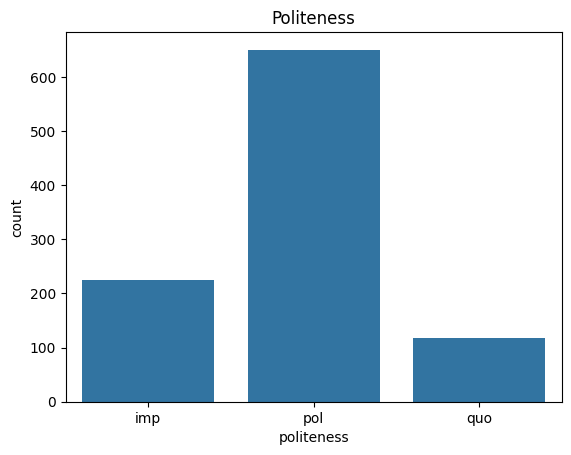

In [39]:
nopol_sum = noef.groupby('politeness').count()
plt.title('Politeness')
sns.barplot(x = 'politeness', y = 'count', data = nopol_sum)
plt.savefig('image/nopol.png')

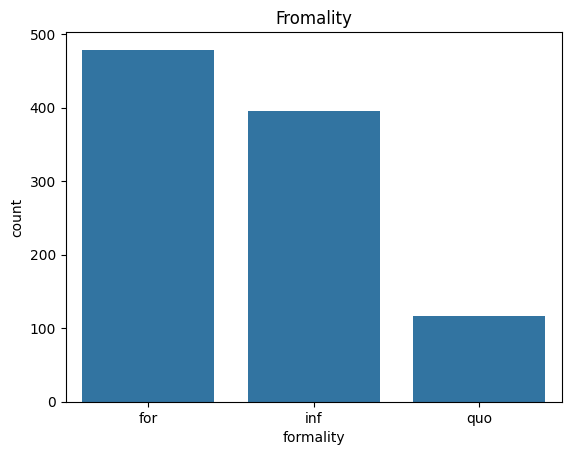

In [56]:
nofor_sum = noef.groupby('formality').count()
plt.title('Fromality')
sns.barplot(x = 'formality', y = 'count', data = nofor_sum)
plt.savefig('image/nofor.png')